In [1]:
import yaml, json
from glob import glob

In [24]:
postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/covid/'
addr_scratch = prefix+'lungs_scratch_2021-11-22_18-11-33/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_scratch,attempts=*' + postfix
addr_sorting = prefix+'lungs_sorting_2021-11-23_09-45-37/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting,attempts=*' + postfix


In [39]:
all_partitions = ['1.0', '0.1', '0.01', '0.005']

In [17]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [40]:
addresses = {
#     'simclr': addr_simclr,
#     'simclr-inside': addr_simclr2,
    'none': addr_scratch, 
    'sorting': addr_sorting,
#     'sorting-noncropped': addr_sorting_u
}

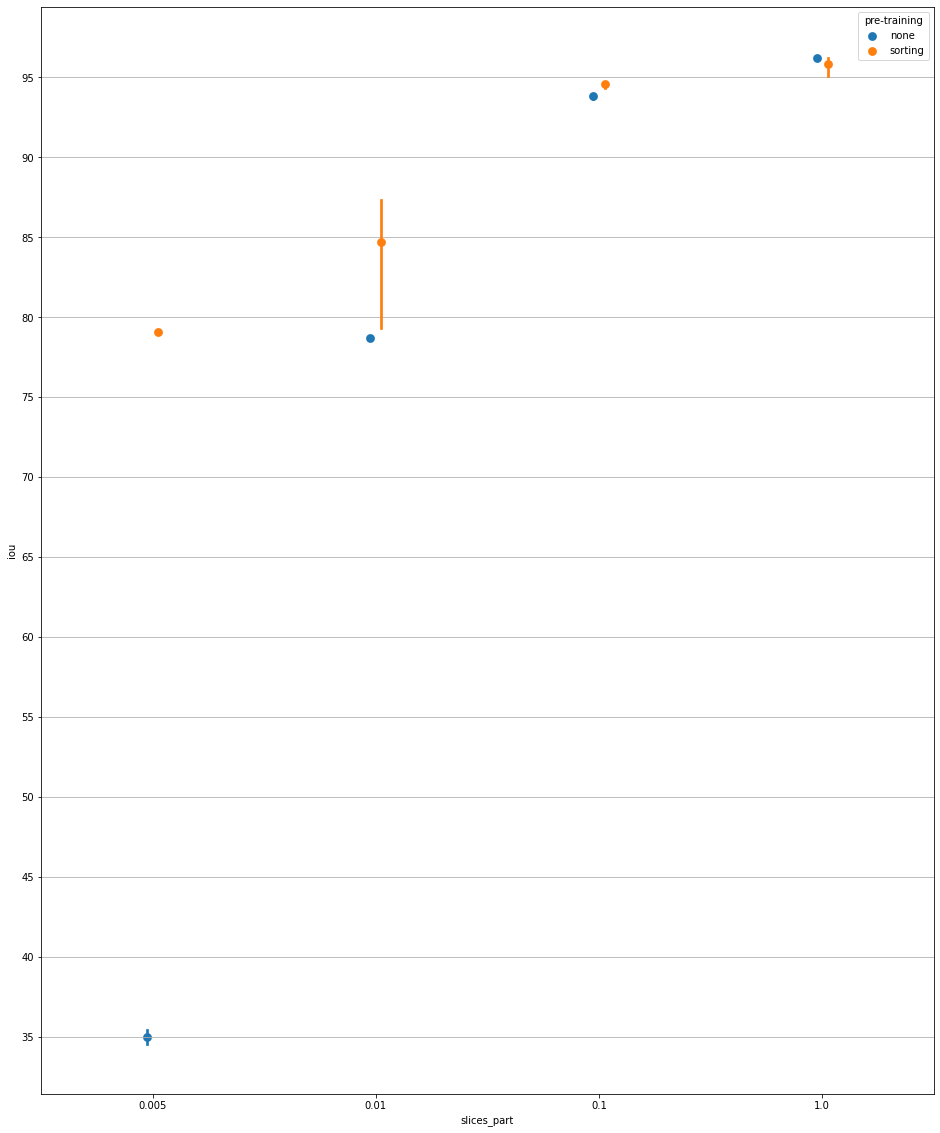

In [134]:
all_runs = []
for name, address in addresses.items():
    for slc_partition in all_partitions:
        all_metrics = glob(address.format(part=slc_partition))
        for metric in all_metrics:
            with open(metric) as f:
                metric_data = json.load(f)
            current_measure = {'pre-training': name, 
                               'slices_part': float(slc_partition), 
                               'iou': metric_data['best']['mean-iou']}
            all_runs.append(current_measure)

all_runs = pd.DataFrame(all_runs)

plt.figure(figsize=(16, 20))
sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', dodge=True, join=False, ci=100)
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()

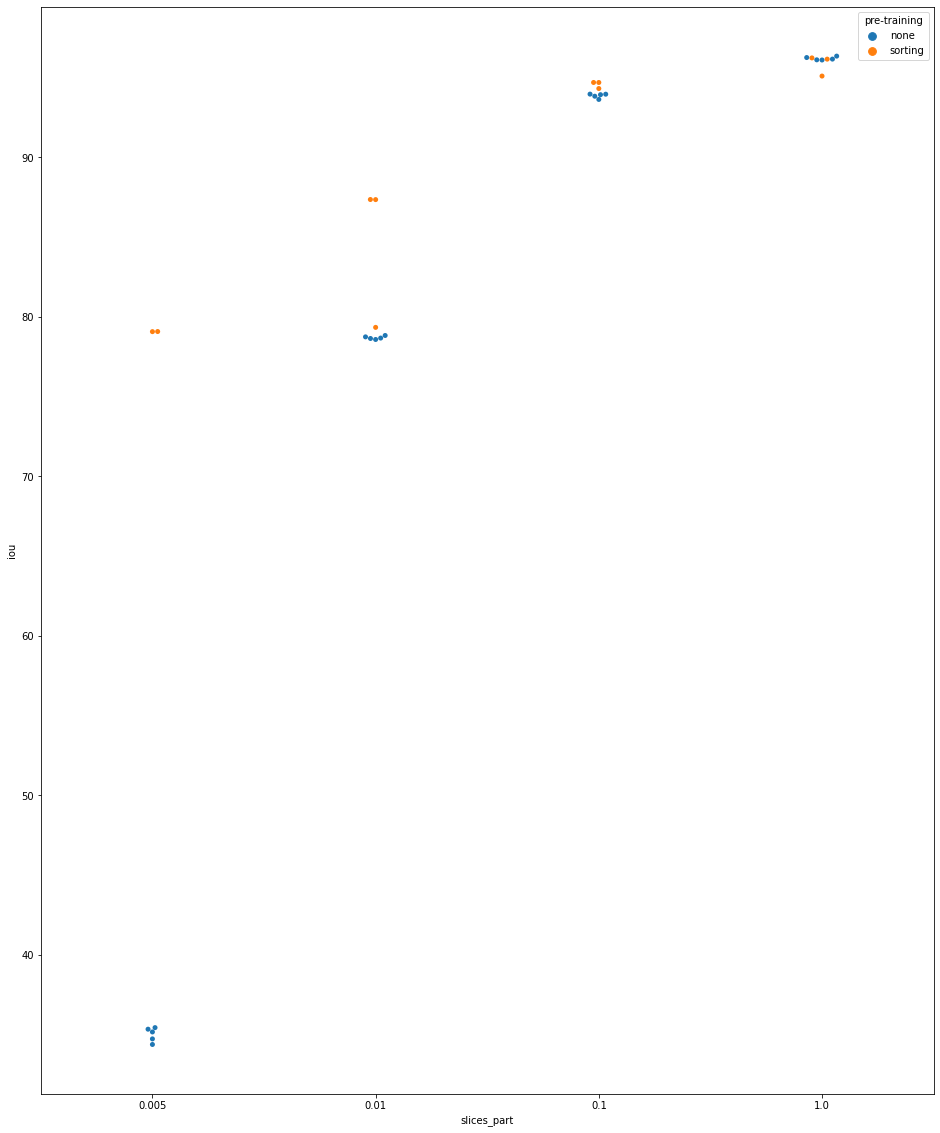

In [135]:
plt.figure(figsize=(16, 20))
# sns.boxplot(x="slices_part", y="iou", hue="pre-training", data=all_runs, width=0.1)
sns.swarmplot(x="slices_part", y="iou", hue="pre-training", data=all_runs)
# sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', ci=None, scale=0.3, marker='D')
# sns.violinplot(x="slices_part", y="iou", hue="pre-training", data=pd.DataFrame(all_runs))
plt.show()

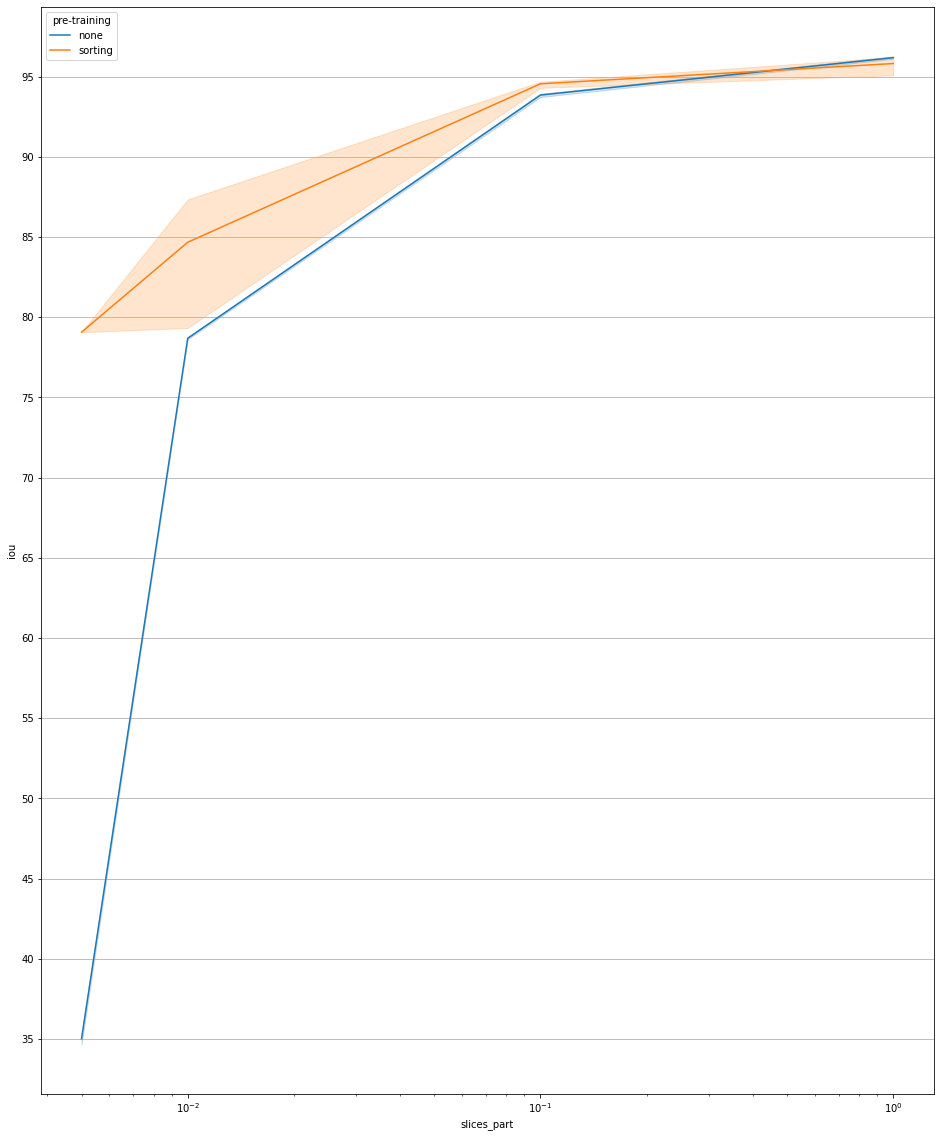

In [136]:
plt.figure(figsize=(16, 20))
grid = sns.lineplot(data=all_runs, x='slices_part', y='iou', hue='pre-training')
grid.set(xscale="log")
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()